<a href="https://colab.research.google.com/github/arpanastanley/BrainTumor/blob/main/BrainTumor_using_Correlation_and_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BRAIN TUMOR**
A cancerous or non-cancerous mass or growth of abnormal cells in the brain.


### **Symptoms:**
*New or increasingly strong headaches

*Blurred vision

*Loss of balance

*confusion

*seizures


### **Treatment:**
Brain tumors are treated with surgery, radiation therapy and chemotherapy.

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the Dataset
df=pd.read_csv('/content/drive/MyDrive/braintumor.csv')
df

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,-156,-115,-140,149,-111,-334,-47,-204,-148,377,...,1483,-10,182,-16,472,1,27,51,-27,medulloblastoma
1,16,-63,-89,92,-394,-719,290,-132,238,141,...,2490,-66,-151,-280,1484,165,56,328,-61,medulloblastoma
2,34,-81,163,110,-230,-353,158,-114,-11,66,...,1742,154,445,-57,784,379,-58,36,-77,medulloblastoma
3,-72,-58,60,170,-117,-328,264,-71,-2,55,...,1042,-23,130,-88,605,319,28,-51,-80,medulloblastoma
4,-552,-212,-191,374,-50,-404,-399,-61,-219,-6,...,84,-961,-712,-741,842,91,-627,-563,-751,medulloblastoma
5,33,-110,-31,12,-267,-663,239,-238,3,195,...,1922,245,76,-61,1327,687,-18,193,-55,medulloblastoma
6,-76,-54,97,-6,-100,-541,488,-97,76,-1,...,1264,-17,312,-24,717,418,-54,57,-67,medulloblastoma
7,-159,-148,-474,595,-708,-744,708,-304,131,379,...,2970,212,453,-265,1673,719,216,336,-31,medulloblastoma
8,-106,-14,87,177,-305,-300,21,-106,-17,-46,...,693,-19,124,-8,135,174,-5,183,-53,medulloblastoma
9,-432,-173,-101,65,-286,-505,888,-137,-10,-42,...,1396,-284,133,-149,995,252,-136,50,-280,medulloblastoma


# **BASIC PREPROCESSING**

In [3]:
df.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,-156,-115,-140,149,-111,-334,-47,-204,-148,377,...,1483,-10,182,-16,472,1,27,51,-27,medulloblastoma
1,16,-63,-89,92,-394,-719,290,-132,238,141,...,2490,-66,-151,-280,1484,165,56,328,-61,medulloblastoma
2,34,-81,163,110,-230,-353,158,-114,-11,66,...,1742,154,445,-57,784,379,-58,36,-77,medulloblastoma
3,-72,-58,60,170,-117,-328,264,-71,-2,55,...,1042,-23,130,-88,605,319,28,-51,-80,medulloblastoma
4,-552,-212,-191,374,-50,-404,-399,-61,-219,-6,...,84,-961,-712,-741,842,91,-627,-563,-751,medulloblastoma


In [4]:
df.tail(7)

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
33,-1425,-1074,226,867,-426,-1343,591,-108,105,121,...,5468,-1093,2588,-640,6276,2509,-574,426,-670,Normal
34,-80,-4,291,318,-300,-568,-22,-264,300,0,...,2275,-71,286,-120,430,313,71,282,-165,PNET
35,-72,-24,-268,122,-256,-428,345,-264,349,128,...,2084,24,355,-90,521,233,-31,41,-55,PNET
36,-394,-605,827,471,-673,-875,1654,-798,471,-923,...,4058,211,28,134,4058,461,19,884,-375,PNET
37,8,-408,51,198,-408,-1046,-1016,-681,-212,35,...,6792,-81,890,-223,2141,929,136,569,-89,PNET
38,-89,-64,14,163,-143,-391,1010,-326,-163,336,...,2571,-59,-128,-252,198,59,-123,-34,-203,PNET
39,-106,-359,14,424,-548,-937,-932,-334,-151,-263,...,1791,89,218,59,1076,727,37,-64,-104,PNET


In [5]:
df.shape

(40, 7130)

In [6]:
df.isnull().sum()

AFFX-BioB-5_at    0
AFFX-BioB-M_at    0
AFFX-BioB-3_at    0
AFFX-BioC-5_at    0
AFFX-BioC-3_at    0
                 ..
Z17240_at         0
L49218_f_at       0
M71243_f_at       0
Z78285_f_at       0
class             0
Length: 7130, dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

AFFX-BioB-5_at     int64
AFFX-BioB-M_at     int64
AFFX-BioB-3_at     int64
AFFX-BioC-5_at     int64
AFFX-BioC-3_at     int64
                   ...  
Z17240_at          int64
L49218_f_at        int64
M71243_f_at        int64
Z78285_f_at        int64
class             object
Length: 7130, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 7130 entries, AFFX-BioB-5_at to class
dtypes: int64(7129), object(1)
memory usage: 2.2+ MB


In [11]:
df['class'].value_counts()

medulloblastoma    10
glioma             10
RhabdoidTu         10
PNET                6
Normal              4
Name: class, dtype: int64

# **BRAIN TUMOR CLASSIFICATION**


### Medulloblastoma - A cancerous brain tumor that starts in the lower back part of the brain

### Glioma - A type of tumour that occurs in the brain and spinal cord.

### RhabdoidTu - A type of cancer that usually forms in the kidney or central nervous system (the brain and spinal cord) but can also form in soft tissues in other areas of the body.

### Normal - The Particular individual does not have brain tumor.

### PNET - A type of cancerous tumors which appear similar under the microscope to medulloblastoma but occur primarily in the top part of the brain (the cerebrum).

In [12]:
#Choosing the Independent variables
x=df.iloc[:,:-1]
x

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-156,-115,-140,149,-111,-334,-47,-204,-148,377,...,172,1483,-10,182,-16,472,1,27,51,-27
1,16,-63,-89,92,-394,-719,290,-132,238,141,...,56,2490,-66,-151,-280,1484,165,56,328,-61
2,34,-81,163,110,-230,-353,158,-114,-11,66,...,200,1742,154,445,-57,784,379,-58,36,-77
3,-72,-58,60,170,-117,-328,264,-71,-2,55,...,72,1042,-23,130,-88,605,319,28,-51,-80
4,-552,-212,-191,374,-50,-404,-399,-61,-219,-6,...,61,84,-961,-712,-741,842,91,-627,-563,-751
5,33,-110,-31,12,-267,-663,239,-238,3,195,...,202,1922,245,76,-61,1327,687,-18,193,-55
6,-76,-54,97,-6,-100,-541,488,-97,76,-1,...,200,1264,-17,312,-24,717,418,-54,57,-67
7,-159,-148,-474,595,-708,-744,708,-304,131,379,...,1088,2970,212,453,-265,1673,719,216,336,-31
8,-106,-14,87,177,-305,-300,21,-106,-17,-46,...,1,693,-19,124,-8,135,174,-5,183,-53
9,-432,-173,-101,65,-286,-505,888,-137,-10,-42,...,111,1396,-284,133,-149,995,252,-136,50,-280


In [13]:
y=df.iloc[:,-1]
print(y)

0     medulloblastoma
1     medulloblastoma
2     medulloblastoma
3     medulloblastoma
4     medulloblastoma
5     medulloblastoma
6     medulloblastoma
7     medulloblastoma
8     medulloblastoma
9     medulloblastoma
10             glioma
11             glioma
12             glioma
13             glioma
14             glioma
15             glioma
16             glioma
17             glioma
18             glioma
19             glioma
20         RhabdoidTu
21         RhabdoidTu
22         RhabdoidTu
23         RhabdoidTu
24         RhabdoidTu
25         RhabdoidTu
26         RhabdoidTu
27         RhabdoidTu
28         RhabdoidTu
29         RhabdoidTu
30             Normal
31             Normal
32             Normal
33             Normal
34               PNET
35               PNET
36               PNET
37               PNET
38               PNET
39               PNET
Name: class, dtype: object


In [14]:
y.describe()

count                  40
unique                  5
top       medulloblastoma
freq                   10
Name: class, dtype: object

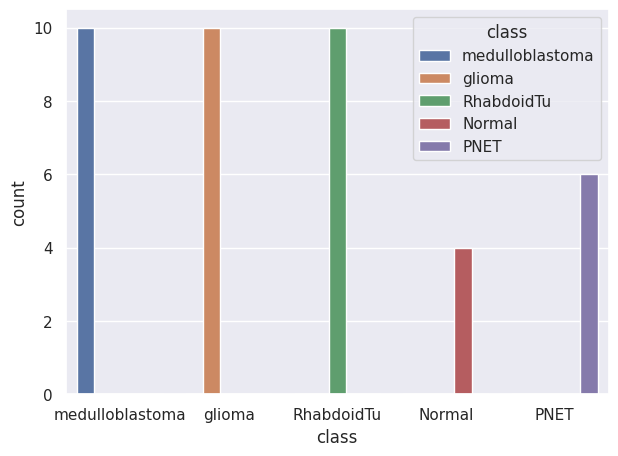

In [43]:
#Pictorial Representation of the three classes present in the dataset
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x ='class', hue = "class", data = df)
plt.show()

**Since the Dependent variable is Categorical variable,**

**We encode the Dependent variable using LabelEncoder** 

In [16]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
y=label_encoder.fit_transform(y)
y

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

**Checking the count of the labels "0", "1", "2", "3", "4" present in the dataset.**

0 - Normal

1 - PNET

2 - RhabdoidTu

3 - Glioma

4 - Medullablastoma

In [17]:
print(y[y==0].shape[0], y[y==1].shape[0],y[y==2].shape[0],y[y==3].shape[0],y[y==4].shape[0])

4 6 10 10 10


# **FEATURE SELECTION USING CORRELATION**

In [18]:
selected_features = x.columns

In [19]:
#Importing the pearsonr function from the scipy.stats module
import pandas as pd
from scipy.stats import pearsonr

In [20]:
#Converting x values into int datatype
import pandas as pd 
x = x.astype(int)
x.dtypes

AFFX-BioB-5_at    int64
AFFX-BioB-M_at    int64
AFFX-BioB-3_at    int64
AFFX-BioC-5_at    int64
AFFX-BioC-3_at    int64
                  ...  
X83863_at         int64
Z17240_at         int64
L49218_f_at       int64
M71243_f_at       int64
Z78285_f_at       int64
Length: 7129, dtype: object

In [21]:
corr, _ = pearsonr(x[selected_features[2]], y)

In [22]:
# Writing a for loop to find the correlation between 4524 independent variables and 
# the dependent variable using pearsonr() function
# the error on this line is an index exception, which can be ignored 
new_list=[]
for i in range(0,7129):
    corr, _ = pearsonr(x[selected_features[i]], y)
    print('Pearsons correlation: %.3f' % corr,[selected_features[i]])
    new_list.append(corr)

Streaming output truncated to the last 5000 lines.
Pearsons correlation: 0.144 ['M63483_at']
Pearsons correlation: 0.203 ['M63488_at']
Pearsons correlation: 0.163 ['M63573_at']
Pearsons correlation: 0.151 ['M63582_at']
Pearsons correlation: 0.067 ['M63589_at']
Pearsons correlation: -0.232 ['M63603_at']
Pearsons correlation: 0.003 ['M63623_at']
Pearsons correlation: 0.236 ['M63835_at']
Pearsons correlation: 0.032 ['M63896_at']
Pearsons correlation: -0.031 ['M63904_at']
Pearsons correlation: 0.299 ['M63928_at']
Pearsons correlation: -0.314 ['M63959_at']
Pearsons correlation: -0.053 ['M63962_rna1_at']
Pearsons correlation: -0.205 ['M63967_at']
Pearsons correlation: -0.192 ['M64082_at']
Pearsons correlation: -0.094 ['M64098_at']
Pearsons correlation: 0.160 ['M64099_at']
Pearsons correlation: -0.350 ['M64108_at']
Pearsons correlation: 0.089 ['M64174_at']
Pearsons correlation: -0.225 ['M64347_at']
Pearsons correlation: 0.339 ['M64358_at']
Pearsons correlation: -0.104 ['M64497_at']
Pearsons c

# **FEATURE SELECTION USING ANOVA TEST**


Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

**ANOVA:**

*ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

*The results of this test can be used for feature selection where those features that are independent of the target variable can be removed from the dataset.

In [23]:
# SelectKBest -- Select features according to the k highest scores.
# f_classif -- Compute the ANOVA F-value for the provided sample.
#F- Value - It is the ratio of two Chi-distributions divided by its degrees of Freedom
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
select = SelectKBest(f_classif,k=50)
z = select.fit_transform(x,y)
 
print("After selecting best 50 features:", z.shape) 

After selecting best 50 features: (40, 50)


In [27]:
New_features=select.get_feature_names_out()
print(New_features)

['D21267_at' 'D29013_at' 'D31883_at' 'D63477_at' 'D83542_at' 'D87463_at'
 'D87465_at' 'J04469_at' 'J04615_at' 'L22214_at' 'L33243_at' 'L35592_at'
 'L47738_at' 'L77864_at' 'M16447_at' 'M33653_at' 'M37400_at' 'M58583_at'
 'M96859_at' 'M99063_at' 'U16296_at' 'U25029_at' 'U39412_at' 'U52827_at'
 'U67171_at' 'U67963_at' 'U76421_at' 'U79245_at' 'U79288_at' 'U79289_at'
 'U90902_at' 'X05196_at' 'X13227_at' 'X14968_at' 'X51956_rna1_at'
 'X63578_rna1_at' 'Y00067_rna1_at' 'Z15108_at' 'D26070_at' 'L76627_at'
 'U33632_at' 'X14766_at' 'X80818_at' 'D63479_s_at' 'L07807_s_at'
 'L13266_s_at' 'L10338_s_at' 'X70940_s_at' 'X92493_s_at' 'U92457_s_at']


In [28]:
New_features=list(New_features)
New_features

['D21267_at',
 'D29013_at',
 'D31883_at',
 'D63477_at',
 'D83542_at',
 'D87463_at',
 'D87465_at',
 'J04469_at',
 'J04615_at',
 'L22214_at',
 'L33243_at',
 'L35592_at',
 'L47738_at',
 'L77864_at',
 'M16447_at',
 'M33653_at',
 'M37400_at',
 'M58583_at',
 'M96859_at',
 'M99063_at',
 'U16296_at',
 'U25029_at',
 'U39412_at',
 'U52827_at',
 'U67171_at',
 'U67963_at',
 'U76421_at',
 'U79245_at',
 'U79288_at',
 'U79289_at',
 'U90902_at',
 'X05196_at',
 'X13227_at',
 'X14968_at',
 'X51956_rna1_at',
 'X63578_rna1_at',
 'Y00067_rna1_at',
 'Z15108_at',
 'D26070_at',
 'L76627_at',
 'U33632_at',
 'X14766_at',
 'X80818_at',
 'D63479_s_at',
 'L07807_s_at',
 'L13266_s_at',
 'L10338_s_at',
 'X70940_s_at',
 'X92493_s_at',
 'U92457_s_at']

# **SPLIT THE TRAIN AND TEST SETS**

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# **STANDARSIZATION**

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# **KFOLD CROSS VALIDATION FOR VARIOUS MACHINE LEARNING MODELS**

In [31]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB

In [32]:
cv=KFold(n_splits=5, random_state=0, shuffle=True)

lrModel = LogisticRegression()
KnModel = KNeighborsClassifier()
RfModel = RandomForestClassifier()
DtModel = DecisionTreeClassifier()
SvmModel = SVC()
XgbModel = xgb.XGBClassifier()
BcModel = BaggingClassifier()
AdbModel = AdaBoostClassifier()
IfModel = IsolationForest()
NBModel = GaussianNB()

In [33]:
scores = cross_val_score(lrModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Logistics Regression Average CV Score: ",scores.mean())

scores = cross_val_score(KnModel, x_train, y_train, cv = cv,scoring='accuracy')
print("KNeighbors Average CV Score: ",scores.mean())

scores = cross_val_score(DtModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Decision Tree Average CV Score: ",scores.mean())

scores = cross_val_score(RfModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Random Forest Average CV Score: ",scores.mean())

scores = cross_val_score(AdbModel, x_train, y_train, cv = cv,scoring='accuracy')
print("AdaBoost Tree Average CV Score: ",scores.mean())

scores = cross_val_score(SvmModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Support Vector Machine Average CV Score: ",scores.mean())

scores = cross_val_score(XgbModel, x_train, y_train, cv = cv,scoring='accuracy')
print("XGBoost Average CV Score: ",scores.mean())

scores = cross_val_score(BcModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Bagging Classifier Average CV Score: ",scores.mean())

scores = cross_val_score(IfModel, x_train, y_train, cv = cv,scoring='accuracy')
print("Isolation Forest Average CV Score: ",scores.mean())

scores = cross_val_score(NBModel, x_train, y_train, cv = cv, scoring='accuracy')
print("Naive Bayes Average CV Score: ", scores.mean())

Logistics Regression Average CV Score:  0.6666666666666666
KNeighbors Average CV Score:  0.4666666666666667
Decision Tree Average CV Score:  0.36666666666666664
Random Forest Average CV Score:  0.5
AdaBoost Tree Average CV Score:  0.26666666666666666
Support Vector Machine Average CV Score:  0.4666666666666667
XGBoost Average CV Score:  0.36666666666666664
Bagging Classifier Average CV Score:  0.5333333333333333
Isolation Forest Average CV Score:  0.16666666666666666
Naive Bayes Average CV Score:  0.4333333333333334


# **COMPARISON OF VARIOUS MACHINE LEARNING ALGORITHMS**

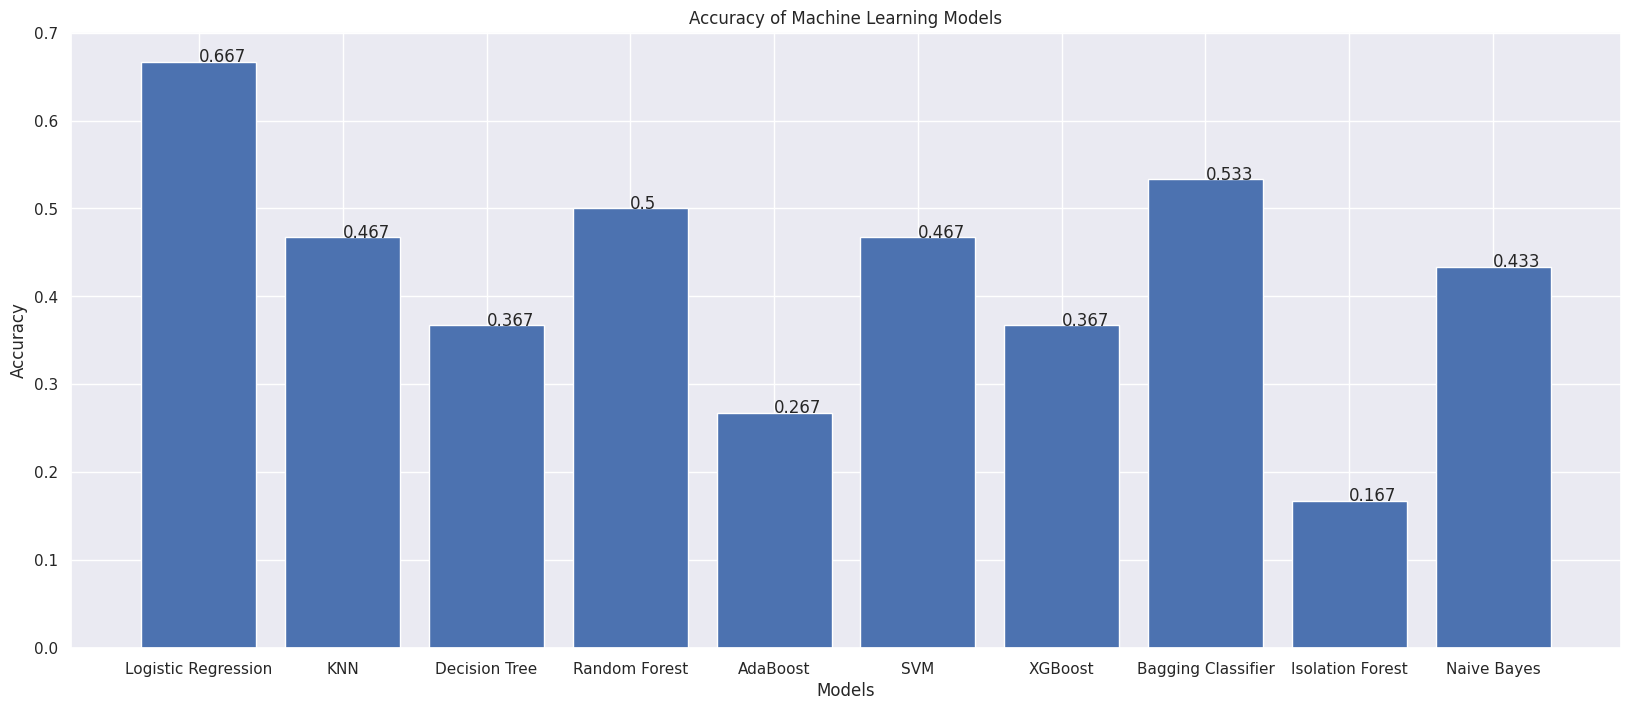

In [34]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'SVM', 'XGBoost', 'Bagging Classifier', 'Isolation Forest', 'Naive Bayes']
accuracy = [0.667, 0.467, 0.367, 0.5, 0.267, 0.467, 0.367, 0.533, 0.167, 0.433]

fig, ax = plt.subplots()
ax.bar(models, accuracy)

# Set the figure size
fig.set_size_inches(20, 8)  # Adjust the width and height as desired

for index, value in enumerate(accuracy):
    plt.text(index, value,
             str(value))

# Add labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Machine Learning Models')

# Display the plot
plt.show()

# **Logistic regression is the top performer**

# **HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION**

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=lrModel, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x,y)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters:  {'C': 10}
Best Score:  0.825


# **LOGISTIC REGRESSION**

*Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. 

*It is used for predicting the categorical dependent variable using a given set of independent variables. 

*Logistic regression predicts the output of a categorical dependent variable.

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=10)
lr.fit(x_train,y_train)

LogisticRegression(C=10)

In [37]:
y_pred_lr = lr.predict(x_test)

## **EVALUATION METRICS**

In [38]:
# Accuracy is the fraction of predictions our model got right. 
# Accuracy = Number of correct predictions / Total number of predictions.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred_lr, y_test)
accuracy

0.9

In [39]:
# A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_lr, y_test)

array([[4, 0, 0],
       [0, 4, 0],
       [1, 0, 1]])

In [40]:
#Classification_report is a evaluation metric in machine learning which is used to show the precision,recall,F1 score, and support score
from sklearn.metrics import classification_report
print(classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         4
           4       1.00      0.50      0.67         2

    accuracy                           0.90        10
   macro avg       0.93      0.83      0.85        10
weighted avg       0.92      0.90      0.89        10

